In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [36]:
df = pd.read_csv(r'C:\Users\ashmi\OneDrive\Desktop\Data science project\Data_Science_Project\Dataset\goldstock.csv')
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


### About this Dataset

goldstock.csv is a dataset that summarizes the gold price outlook for a 10-year period from January 19, 2014 to January 22, 2024. This file contains 2511 rows and 6 columns of important financial information including date, closing price, volume and opening price, up down. This dataset is ideal for time series analysis and market research and is a valuable resource for anyone seeking insight into the dynamic movements and trends of gold prices over a specified 10-year period.



### The Dataset consists of the following columns:

* Date: A unique date for each trading day recorded.
* Close: The closing price of gold on the relevant date.
* Volume: Gold trading volume on the relevant date.
* Open: The opening price of gold on the relevant date.
* High: The highest recorded price of gold during the trading day.
* Low: The lowest price recorded for gold in the trading day

In [37]:
# Drop the unessary column Unnamed
df.drop(columns=['Unnamed: 0'],inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2511 non-null   object 
 1   Close   2511 non-null   float64
 2   Volume  2511 non-null   float64
 3   Open    2511 non-null   float64
 4   High    2511 non-null   float64
 5   Low     2511 non-null   float64
dtypes: float64(5), object(1)
memory usage: 117.8+ KB


* There are total 2511 rows and 7 columns.
* Each column has no missing values.
* Date column has an object format so converting it to datetime format.

In [39]:
# Date formatting to ensure the datetime for proper time series analysis
df['Date'] = pd.to_datetime(df['Date'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2511 non-null   datetime64[ns]
 1   Close   2511 non-null   float64       
 2   Volume  2511 non-null   float64       
 3   Open    2511 non-null   float64       
 4   High    2511 non-null   float64       
 5   Low     2511 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 117.8 KB


In [41]:
# Sort by Date- Earliest to latest
df = df.sort_values(by='Date',ascending=True)

In [42]:
print(f'Dataframe contains stock prices between {df.Date.min()} {df.Date.max()}')
print(f'Total days={(df.Date.max()- df.Date.min()).days} days')

Dataframe contains stock prices between 2014-01-22 00:00:00 2024-01-19 00:00:00
Total days=3649 days


In [43]:
df.describe()

,Date,Close,Volume,Open,High,Low
count,2511,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,2019-01-17 07:28:27.526881792,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
min,2014-01-22 00:00:00,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,2016-07-19 12:00:00,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,2019-01-17 00:00:00,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,2021-07-17 12:00:00,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2024-01-19 00:00:00,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000
std,NaN,298.824811,97600.769382,299.118187,301.262244,296.417703


* The Dataset minimum Date Start 2014-01-22 to max 2024-01-19.


In [44]:
df.isna().sum()

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

Dataset does not contain any null values which is good news

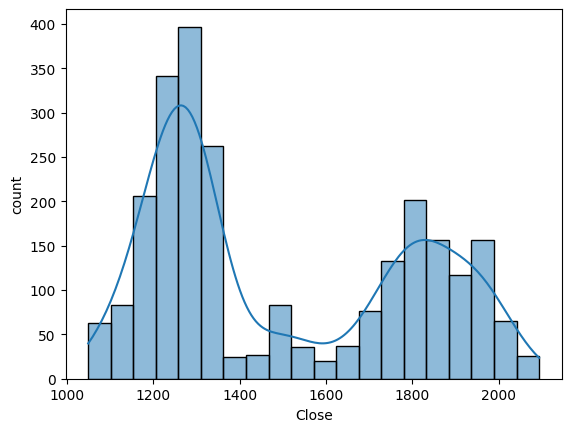

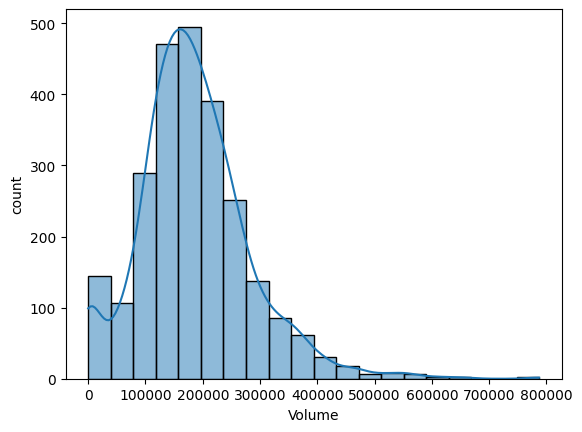

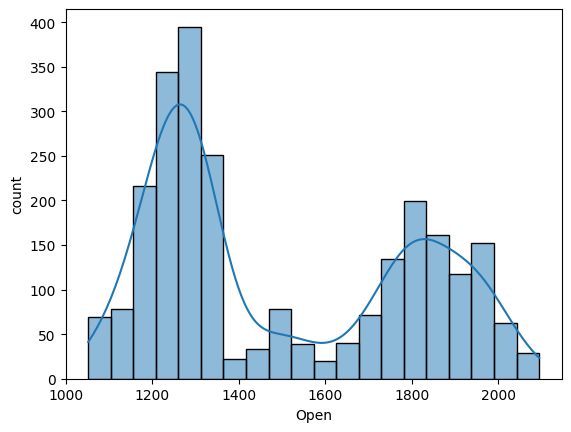

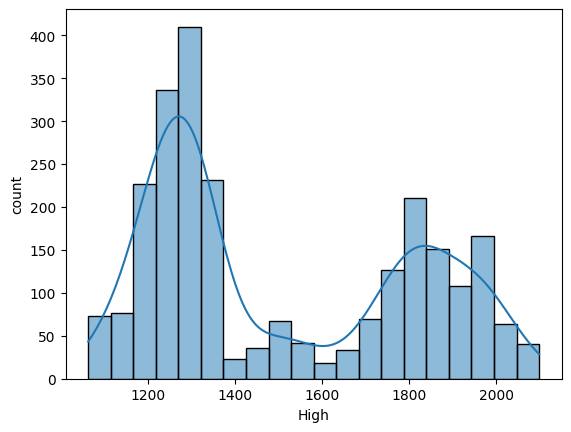

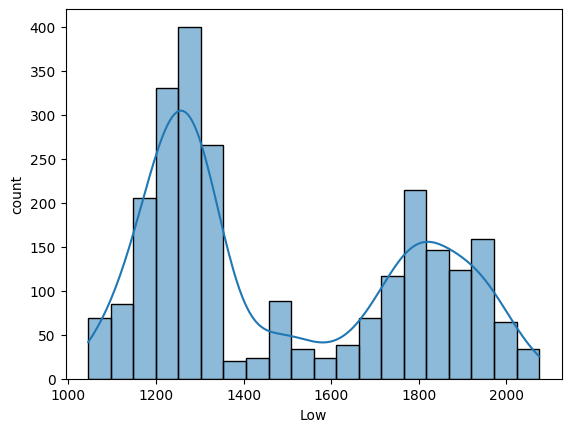

In [45]:
for col in df.columns:
    if df[col].dtype != 'datetime64[ns]':
        sns.histplot(df[col],bins=20,kde=True)
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

### Feature Engineering
Consider creating additional features that could impact gold prices, such as:
* Price Change: Calculate the difference between 'Close' and 'Open' prices.
* Price Range: Calculate the difference between 'High' and 'Low' prices.

In [46]:
# Doing some feature engineering to create addtional features.
df['Price Change'] = df['Close'] - df['Open']
df['Price Range'] = df['High'] - df['Low']


In [47]:
df.head()

,Date,Close,Volume,Open,High,Low,Price Change,Price Range
2510,2014-01-22,1238.6,80262.0,1240.5,1243.5,1235.5,-1.9,8.0
2509,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8,27.4,36.3
2508,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9,0.2,16.3
2507,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0,-6.4,28.1
2506,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0,-4.4,13.9


### EDA

In [48]:
# Visulize the gold price of preivous 10 years.
fig=px.line(y=df.Close, x=df.Date)
fig.update_traces(line_color='black') 
fig.update_layout(xaxis_title="Date", 
                  yaxis_title="Scaled Price",
                  title={'text': "Gold Price History Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,223,0,0.8)')


The time series graph above displays the historical trends of the previous 10 years to Now in gold stock prices over the past decade. Here are the key insights from the visualization:

* In 2014 the price of the gold increasing in appromaxily 1400 then start to continuously decrease the price appromaxily 1000 in hole year of 2015.
* Again start to increase the price in 2016 to 1400 but again decrease the price in the end of the year.
* In start to increase the price in 2017 to 1400 and down to 1200 in 2018.
* In 2019  the price of the gold continuously increase to 2050 in the end of the 2020 years.
* In starting of the 2021 year decrase the price to 1700 and again increase to 2000 in 2022 but again decrease to 1600 in the end of the year.
* In 2023 to present the price of the gold increase in more than 2000.

In [58]:
# Visulize the trand of gold price
fig = px.line(y= df.Volume,x = df.Date)
fig.update_traces(line_color='black') 
fig.update_layout(xaxis_title="Date", 
                  yaxis_title="Gold Trading Volume on the relevant Year",
                  title={'text': "Trending of Gold Stock", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,223,0,0.8)')


The time series graph above displays the Trend of  historical trends of the previous 10 years to Now in gold stock prices over the past decade. Here are the key insights from the visualization:

* In 2014-2016 the gold max trend to 500k and min to 900.
* In 2017- 2018 the gold trend continuously decrease so max 500k min 0.
* The starting of the year 2019-2020 the highest trend of the gold max 800k but again start to decrease the trand at the end of the year.
* In 2021-2024 the gold trend decrease continuouly so high trend 400k low trend 300.

In [50]:
fig = px.line(y= df['Price Change'],x = df.Date)
fig.update_traces(line_color='black') 
fig.update_layout(xaxis_title="Date", 
                  yaxis_title="Scale of Price change(Close-Open)",
                  title={'text': "Price change of Gold stock", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,223,0,0.8)')

In [51]:
fig = px.line(y= df['Price Range'],x = df.Date)
fig.update_traces(line_color='black') 
fig.update_layout(xaxis_title="Date", 
                  yaxis_title="Scale of Price range(High-Low)",
                  title={'text': "Price range of Gold Stock", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,223,0,0.8)')

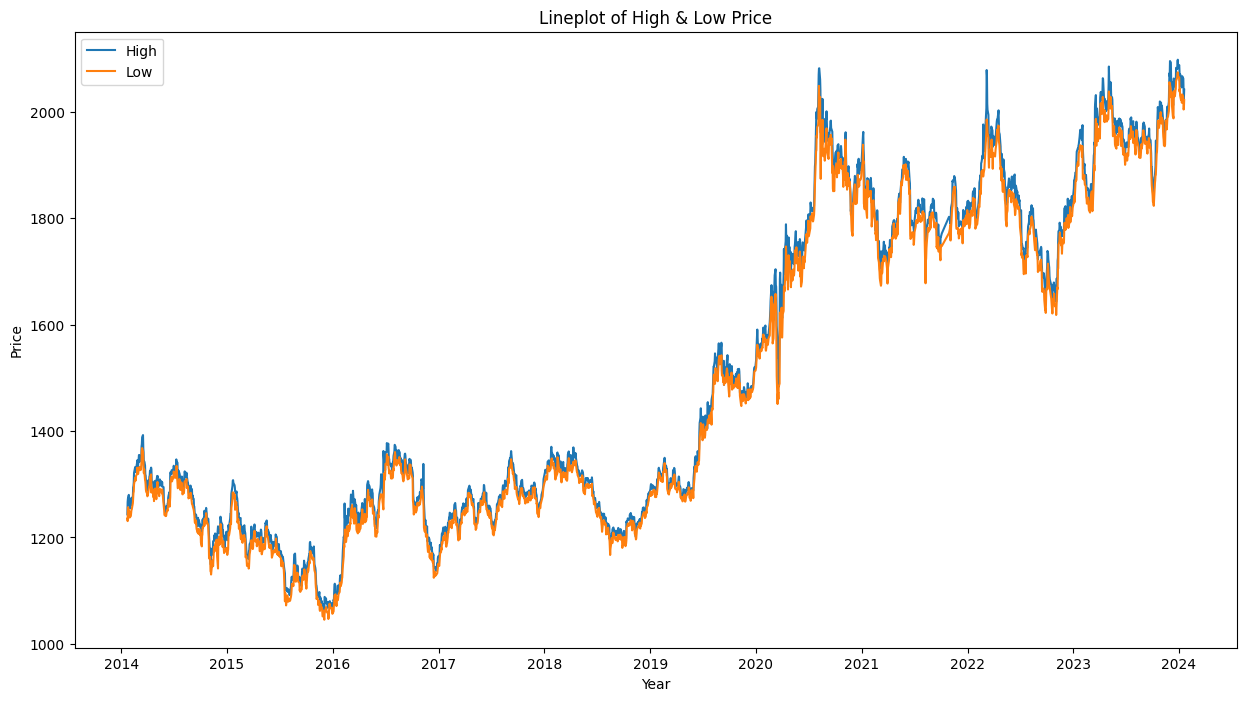

In [55]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df,x='Date',y='High',label='High')
sns.lineplot(data=df,x='Date',y='Low',label='Low')
plt.legend()
plt.title('Lineplot of High & Low Price')
plt.ylabel('Price')
plt.xlabel('Year')
plt.show()

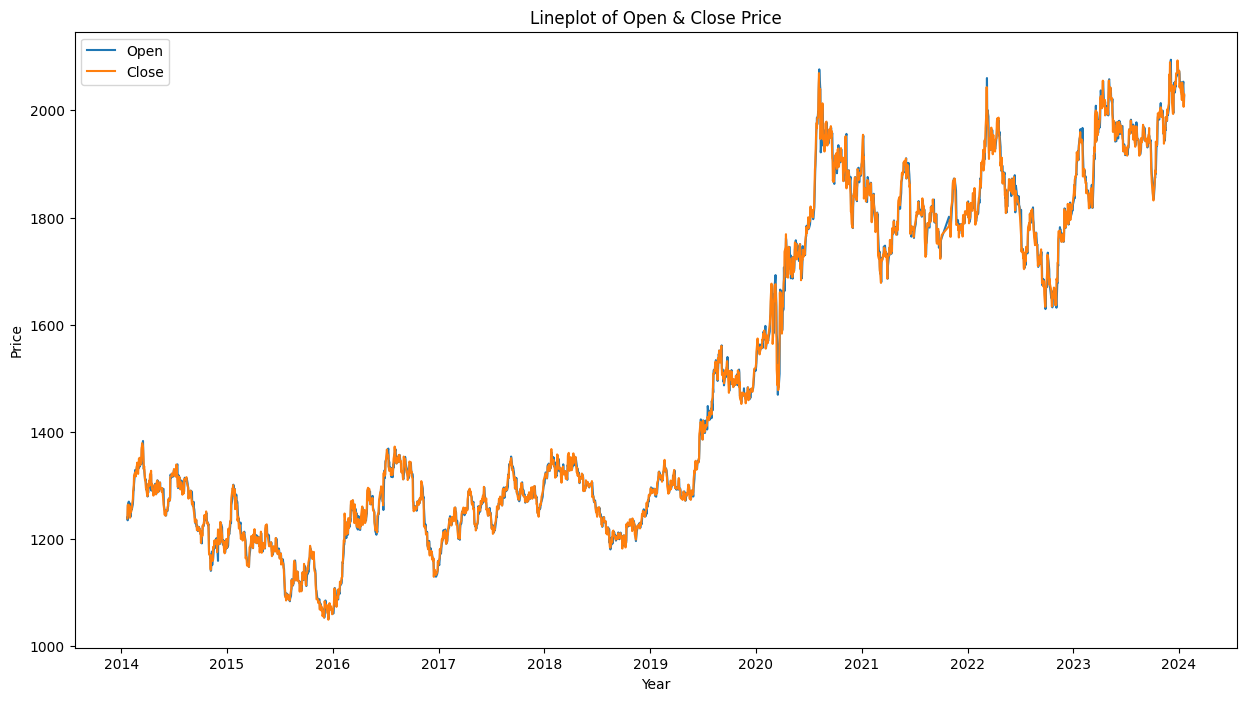

In [56]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df,x='Date',y='Open',label='Open')
sns.lineplot(data=df,x='Date',y='Close',label='Close')
plt.legend()
plt.title('Lineplot of Open & Close Price')
plt.ylabel('Price')
plt.xlabel('Year')
plt.show()